In [32]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# Dependencies
import tweepy
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
os.chdir(os.path.join('..','..','..','..','..','..'))
curr_working_directory = os.getcwd()
os.getcwd()
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
#api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
target_terms = ('@BBC','@Fox','@CNN','@CBS','@nytimes')

tweets = []
target_list = []
user_list = []
compound_list = []
tweet_id = []
created_at = []
favorite_count = []
tweet_text_list = []
pos_list = []
neg_list = []
neu_list = []
api = tweepy.API(auth)

In [5]:
for target in target_terms:
    
    for tweet in tweepy.Cursor(api.user_timeline, target, tweet_mode='extended').items(100):
        tweets.append(tweet)
    

In [6]:
len(tweets)

500

In [7]:
for t in tweets:
    tweet_user = t.user.screen_name
    tweet_text = t.full_text
    results = analyzer.polarity_scores(tweet_text)
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
    
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    #favorite_count.append(t.favorite_count)
    tweet_text_list.append(tweet_text)
    compound_list.append(compound)
    user_list.append(tweet_user)
    pos_list.append(pos)
    neg_list.append(neg)
    neu_list.append(neu)

In [8]:
tweets_df = pd.DataFrame({
    'User': user_list,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Tweet Text': tweet_text_list,
    'Compound': compound_list,
    'Positive': pos_list,
    'Negative': neg_list,
    'Neutral': neu_list
    })
tweets_df

,User,Tweet ID,Tweet Time,Tweet Text,Compound,Positive,Negative,Neutral
0,BBC,1264224821493157890,2020-05-23 16:01:00,#FindingDory = perfect weekend film! 🙌🐠\n\n6...,0.6114,0.174,0.000,0.826
1,BBC,1264209722007343104,2020-05-23 15:01:00,We hope this brings you some much needed tranq...,0.8074,0.249,0.000,0.751
2,BBC,1264179523194703872,2020-05-23 13:01:00,"""If any good can come of me sharing my experie...",0.7184,0.245,0.096,0.660
3,BBC,1264176066379296768,2020-05-23 12:47:16,RT @BBCTheOneShow: In support of #MentalHealth...,0.4019,0.172,0.000,0.828
4,BBC,1264164423763025920,2020-05-23 12:01:00,Israeli investors develop face mask with remot...,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...
495,nytimes,1263852134564495362,2020-05-22 15:20:04,"In Opinion\n\n""The Chinese Communist Party is ...",0.5994,0.141,0.044,0.815
496,nytimes,1263848939465445379,2020-05-22 15:07:23,Joe Biden said on Friday that black voters tor...,0.0258,0.054,0.051,0.895
497,nytimes,1263847153044258817,2020-05-22 15:00:17,"Bernice Silver, known as the Queen of Potpourr...",-0.0772,0.087,0.095,0.818
498,nytimes,1263844592115486722,2020-05-22 14:50:06,"As global temperatures have climbed, so have m...",0.4215,0.113,0.000,0.887


In [9]:
base = tweets_df.loc[0,'User']

counter = 0
for index, tweet_row in tweets_df.iterrows():
    if tweet_row['User'] == base:
        tweets_df.loc[index, 'tweets_ago'] = counter
        counter +=1
    if tweet_row['User'] != base:
        counter=0
        tweets_df.loc[index, 'tweets_ago'] = counter
        base = tweet_row['User']
        counter +=1
   

In [10]:
tweets_df

,User,Tweet ID,Tweet Time,Tweet Text,Compound,Positive,Negative,Neutral,tweets_ago
0,BBC,1264224821493157890,2020-05-23 16:01:00,#FindingDory = perfect weekend film! 🙌🐠\n\n6...,0.6114,0.174,0.000,0.826,0.0
1,BBC,1264209722007343104,2020-05-23 15:01:00,We hope this brings you some much needed tranq...,0.8074,0.249,0.000,0.751,1.0
2,BBC,1264179523194703872,2020-05-23 13:01:00,"""If any good can come of me sharing my experie...",0.7184,0.245,0.096,0.660,2.0
3,BBC,1264176066379296768,2020-05-23 12:47:16,RT @BBCTheOneShow: In support of #MentalHealth...,0.4019,0.172,0.000,0.828,3.0
4,BBC,1264164423763025920,2020-05-23 12:01:00,Israeli investors develop face mask with remot...,0.0000,0.000,0.000,1.000,4.0
...,...,...,...,...,...,...,...,...,...
495,nytimes,1263852134564495362,2020-05-22 15:20:04,"In Opinion\n\n""The Chinese Communist Party is ...",0.5994,0.141,0.044,0.815,95.0
496,nytimes,1263848939465445379,2020-05-22 15:07:23,Joe Biden said on Friday that black voters tor...,0.0258,0.054,0.051,0.895,96.0
497,nytimes,1263847153044258817,2020-05-22 15:00:17,"Bernice Silver, known as the Queen of Potpourr...",-0.0772,0.087,0.095,0.818,97.0
498,nytimes,1263844592115486722,2020-05-22 14:50:06,"As global temperatures have climbed, so have m...",0.4215,0.113,0.000,0.887,98.0


In [11]:
#x = tweets_df.iloc[0:100,5]

bbc_data = tweets_df['User'] == 'BBC'
cnn_data = tweets_df['User'] == 'CNN'
fox_data = tweets_df['User'] == 'fox'
cbs_data = tweets_df['User'] == 'CBS'
nyt_data = tweets_df['User'] == 'nytimes'

In [19]:
bbc = tweets_df.loc[bbc_data]
cnn = tweets_df.loc[cnn_data]
cbs = tweets_df.loc[cbs_data]
fox = tweets_df.loc[fox_data]
nyt = tweets_df.loc[nyt_data]


In [22]:
bbc1 = bbc['Compound']
cnn1= cnn['Compound']
cbs1= cbs['Compound']
fox1 = fox['Compound']
nyt1 = nyt['Compound']

In [23]:
bbcago = bbc['tweets_ago']
cnnago = cnn['tweets_ago']
cbsago = cbs['tweets_ago']
foxago = fox['tweets_ago']
nytago = nyt['tweets_ago']

No handles with labels found to put in legend.


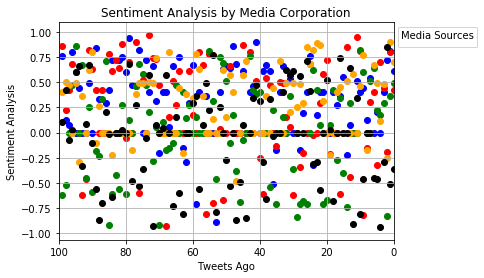

In [35]:
plt.scatter(bbcago,bbc1,color='blue')
plt.scatter(foxago,fox1,color='red')
plt.scatter(cnnago,cnn1,color='green')
plt.scatter(cbsago,cbs1,color='orange')
plt.scatter(nytago,nyt1,color='black')

plt.xlabel("Tweets Ago")
plt.ylabel("Sentiment Analysis")
plt.title("Sentiment Analysis by Media Corporation")
plt.grid(True)
plt.xlim(100,0)
#plt.savefig("output_data/twitter.png"

lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="Media Sources", 
                  labelspacing=0.5)
#plt.show()

In [26]:
plt.savefig("output_data/twitter.png")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/twitter.png'

<Figure size 432x288 with 0 Axes>

In [30]:
# Average all polarities by news source
tweet_polar = tweets_df.groupby(["User"]).mean()["Compound"]

# View the polarities
pd.DataFrame(tweet_polar)

,Compound
User,
BBC,0.310002
CBS,0.269797
CNN,0.028274
fox,0.215978
nytimes,-0.039789


In [36]:
group = tweets_df.groupby(['User'])
mean_df = group.mean()
mean_df = mean_df.reset_index()
mean_df.iloc[1,0] = 'CBS'
mean_df.iloc[3,0] = 'Fox'
mean_df.iloc[4,0] = 'NYT'

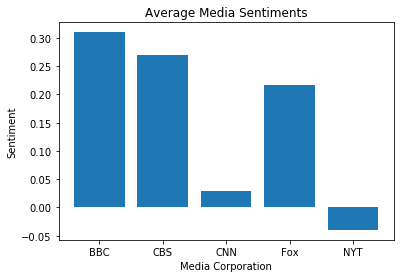

In [38]:
plt.bar(mean_df['User'],mean_df['Compound'])
plt.xlabel('Media Corporation')
plt.ylabel('Sentiment')
plt.title('Average Media Sentiments')

plt.show()

In [ ]:
#-CBS trends toward a more positive sentiment
#-BBC is on average much more positive
#-The NYT is the only one that trends negative on average